<a href="https://colab.research.google.com/github/Sriram-Vaidhyanathan/UCI-ICS-KMeans-Academic-Data-Analysis/blob/main/ICS_Predicting_Academic_Success_Dropout_Test_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.model_selection import train_test_split
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn import preprocessing as pp
# pip install ucimlrepo

# fetch dataset
predict_students_dropout_and_academic_success = fetch_ucirepo(id=697)

# data (as pandas dataframes)
X = predict_students_dropout_and_academic_success.data.features
y = predict_students_dropout_and_academic_success.data.targets

# metadata
print(predict_students_dropout_and_academic_success.metadata)

# variable information
print(predict_students_dropout_and_academic_success.variables)
df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)
df.head()



{'uci_id': 697, 'name': "Predict Students' Dropout and Academic Success", 'repository_url': 'https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success', 'data_url': 'https://archive.ics.uci.edu/static/public/697/data.csv', 'abstract': "A dataset created from a higher education institution (acquired from several disjoint databases) related to students enrolled in different undergraduate degrees, such as agronomy, design, education, nursing, journalism, management, social service, and technologies.\nThe dataset includes information known at the time of student enrollment (academic path, demographics, and social-economic factors) and the students' academic performance at the end of the first and second semesters. \nThe data is used to build classification models to predict students' dropout and academic sucess. The problem is formulated as a three category classification task, in which there is a strong imbalance towards one of the classes.", 'area': 'Social Sc

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:
label_encoder = pp.LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])
df.head()


,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
from matplotlib import pyplot as plt
'''
_df_15['Course'].plot(kind='line', figsize=(8, 4), title='Course')
plt.gca().spines[['top', 'right']].set_visible(False)
# 0 = Drop, 1 = Enrolled, 2 = Graduated
'''

"\n_df_15['Course'].plot(kind='line', figsize=(8, 4), title='Course')\nplt.gca().spines[['top', 'right']].set_visible(False)\n# 0 = Drop, 1 = Enrolled, 2 = Graduated\n"

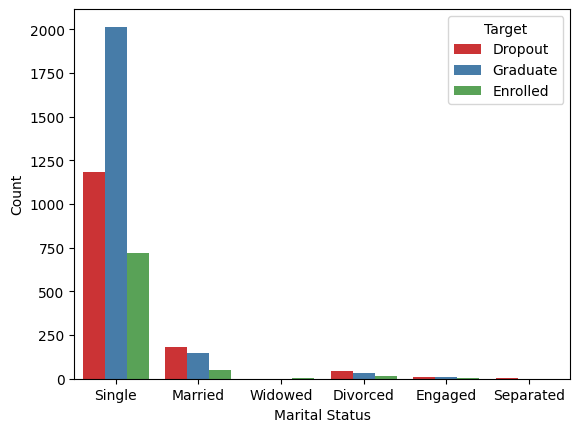

In [ ]:
import seaborn as sns
ax = sns.countplot(x='Marital Status', data=df, hue = 'Target', palette = 'Set1')
plt.xticks([0, 1, 2, 3, 4, 5], ['Single', 'Married', 'Widowed', 'Divorced', 'Engaged', 'Separated'])
plt.xlabel('Marital Status')
plt.ylabel('Count')

sns.move_legend(ax, "upper right")
plt.show()

In [ ]:
# prompt: move the legend in the above seaborn countplot to the left


sns.move_legend(ax, "lower left")
plt.show()
ax

<Axes: xlabel='Marital Status', ylabel='Count'>

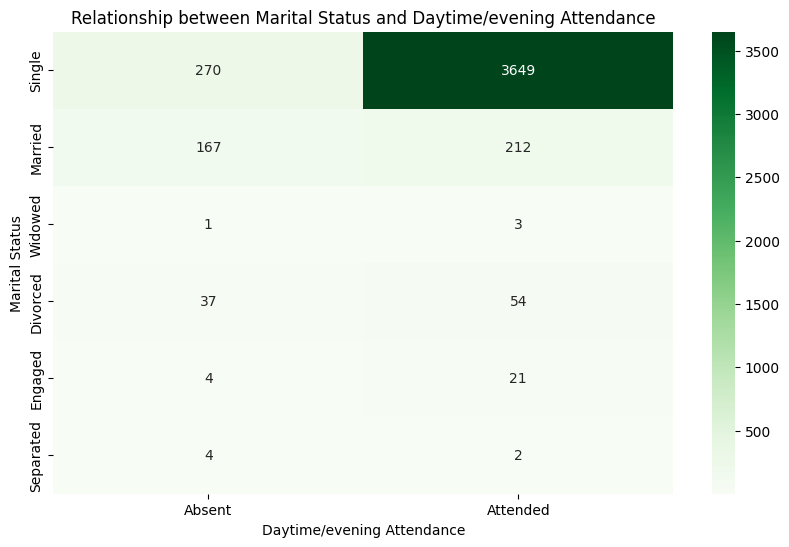

In [ ]:
# Crosstabulation: Seaborn plots two columns against each other, and is converted into a heatmap
crosstab = pd.crosstab(df['Marital Status'], df['Daytime/evening attendance'])


plt.figure(figsize=(10, 6))
crosstab.rename(columns={0: 'Absent', 1: 'Attended'}, inplace=True)
crosstab.rename(index={1: 'Single', 2: 'Married', 3: 'Widowed', 4: 'Divorced', 5: 'Engaged', 6: 'Separated'}, inplace=True)

sns.heatmap(crosstab, annot=True, cmap="Greens", fmt="d")

plt.xlabel('Daytime/evening Attendance')
plt.ylabel('Marital Status')
plt.title('Relationship between Marital Status and Daytime/evening Attendance')
plt.show()

In [ ]:
print(crosstab)
Mar_Attdf = pd.DataFrame(crosstab)
Mar_Attdf

Daytime/evening attendance  Absent  Attended
Marital Status                              
Single                         270      3649
Married                        167       212
Widowed                          1         3
Divorced                        37        54
Engaged                          4        21
Separated                        4         2


Daytime/evening attendance,Absent,Attended
Marital Status,,
Single,270,3649
Married,167,212
Widowed,1,3
Divorced,37,54
Engaged,4,21
Separated,4,2


In [ ]:
Mar_Attdf['PercentRatio'] = ((Mar_Attdf['Absent']/(Mar_Attdf['Absent']+Mar_Attdf['Attended']))*100)
Mar_Attdf

Daytime/evening attendance,Absent,Attended,PercentRatio
Marital Status,,,
Single,270,3649,6.889513
Married,167,212,44.063325
Widowed,1,3,25.000000
Divorced,37,54,40.659341
Engaged,4,21,16.000000
Separated,4,2,66.666667


In [ ]:
print("Duplicate values in index:", Mar_Attdf.index.duplicated().any())
print("Duplicate values in columns:", Mar_Attdf.columns.duplicated().any())

if Mar_Attdf.index.duplicated().any():
    Mar_Attdf = Mar_Attdf.loc[~Mar_Attdf.index.duplicated()]  # Drop duplicate rows/columns

if Mar_Attdf.columns.duplicated().any():
    Mar_Attdf = Mar_Attdf.loc[:, ~Mar_Attdf.columns.duplicated()]

#Percent Column is in light green
def highlight_droppercent(val):
  color = 'lightgreen' if val > 0 else ''
  return 'background-color: {}'.format(color)

Mar_Attdf.style.applymap(highlight_droppercent, subset=['PercentRatio'])


Duplicate values in index: False
Duplicate values in columns: False


<ipython-input-13-63261801f692>:15: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Mar_Attdf.style.applymap(highlight_droppercent, subset=['PercentRatio'])


Daytime/evening attendance,Absent,Attended,PercentRatio
Marital Status,,,
Single,270,3649,6.889513
Married,167,212,44.063325
Widowed,1,3,25.000000
Divorced,37,54,40.659341
Engaged,4,21,16.000000
Separated,4,2,66.666667


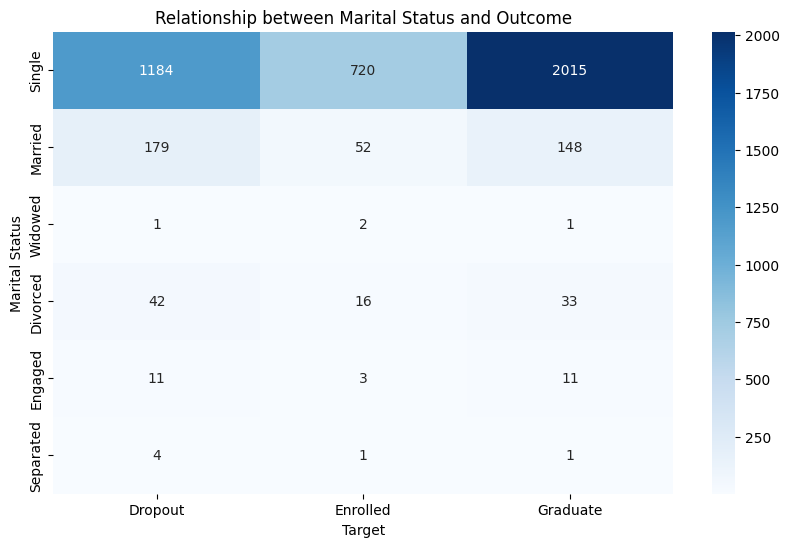

In [ ]:
crosstab = pd.crosstab(df['Marital Status'], df['Target'])



crosstab.rename(columns={0: 'Dropped', 1: 'Enrolled', 2: 'Graduated'}, inplace=True)
crosstab.rename(index={1: 'Single', 2: 'Married', 3: 'Widowed', 4: 'Divorced', 5: 'Engaged', 6: 'Separated'}, inplace=True)

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt="d")

plt.xlabel('Target')
plt.ylabel('Marital Status')
plt.title('Relationship between Marital Status and Outcome')
plt.show()

In [ ]:
Marriagedf = pd.DataFrame(crosstab)
Marriagedf

Target,Dropout,Enrolled,Graduate
Marital Status,,,
Single,1184,720,2015
Married,179,52,148
Widowed,1,2,1
Divorced,42,16,33
Engaged,11,3,11
Separated,4,1,1


In [ ]:
Marriagedf['DropRatio']= ((Marriagedf['Dropout']/(Marriagedf['Dropout']+Marriagedf['Enrolled']+Marriagedf['Graduate']))*100) # Use 'Dropout' instead of 'Dropped'
Marriagedf

Target,Dropout,Enrolled,Graduate,DropRatio
Marital Status,,,,
Single,1184,720,2015,30.211789
Married,179,52,148,47.229551
Widowed,1,2,1,25.000000
Divorced,42,16,33,46.153846
Engaged,11,3,11,44.000000
Separated,4,1,1,66.666667


In [ ]:
# Standard procedure to remove duplicates
print("Duplicate values in index:", Marriagedf.index.duplicated().any())
print("Duplicate values in columns:", Marriagedf.columns.duplicated().any())

if Marriagedf.index.duplicated().any():
    Marriagedf = Marriagedf.loc[~Marriagedf.index.duplicated()]  # Drop duplicate rows

if Marriagedf.columns.duplicated().any():
    Marriagedf = Marriagedf.loc[:, ~Marriagedf.columns.duplicated()]  # Drop duplicate columns

#Percent column is light blue
def highlight_droppercent(val):
  color = 'skyblue' if val > 0 else ''
  return 'background-color: {}'.format(color)

Marriagedf.style.applymap(highlight_droppercent, subset=['DropRatio'])


Duplicate values in index: False
Duplicate values in columns: False


<ipython-input-24-546db53bd6fc>:16: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  Marriagedf.style.applymap(highlight_droppercent, subset=['DropRatio'])


Target,Dropout,Enrolled,Graduate,DropRatio
Marital Status,,,,
Single,1184,720,2015,30.211789
Married,179,52,148,47.229551
Widowed,1,2,1,25.000000
Divorced,42,16,33,46.153846
Engaged,11,3,11,44.000000
Separated,4,1,1,66.666667


In [ ]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
seed = 1234
seed = np.random.seed(seed)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)
LR = LogisticRegression(max_iter = 10000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
test_accuracy = LR.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
train_accuracy = LR.score(X_train, y_train)
print("Train Accuracy:", train_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Test Accuracy: 0.7536723163841808
Train Accuracy: 0.7750777055665442


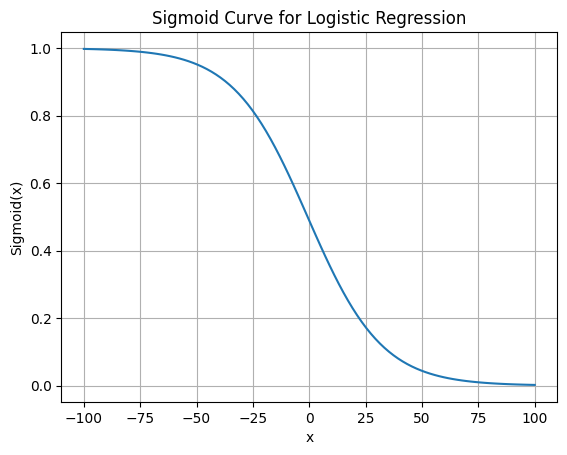

In [ ]:
#Creating the Sigmoid graph (S Curve)
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'LR' is your trained LogisticRegression model
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

# Generate a range of values for the x-axis
x = np.linspace(-100, 100, 100)

# Calculate the corresponding sigmoid values
y = sigmoid(LR.coef_[0][0] * x + LR.intercept_[0])  # Adjust indices as needed

# Plot the sigmoid curve
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('Sigmoid(x)')
plt.title('Sigmoid Curve for Logistic Regression')
plt.grid(True)
plt.show()


How to interpret the sigmoid curve that was just created: https://towardsdatascience.com/understanding-sigmoid-logistic-softmax-functions-and-cross-entropy-loss-log-loss-dbbbe0a17efb


In [ ]:
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier(max_depth = 4, random_state = seed)
DT.fit(X_train, y_train)
print("Test Accuracy:", DT.score(X_test, y_test))
print("Train Accuracy:", DT.score(X_train, y_train))

Test Accuracy: 0.7559322033898305
Train Accuracy: 0.7468211359141


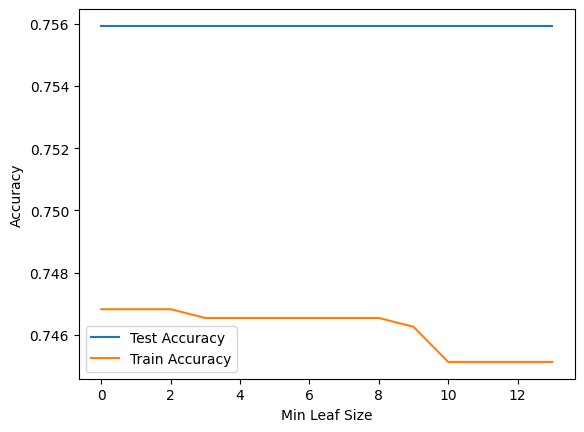

In [ ]:
minLeaf = [i for i in range(1, 15)]
tr_acc = []
te_acc = []
for leaf in minLeaf:
  DT = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = leaf, random_state=seed)
  DT.fit(X_train, y_train)
  tr_acc.append(DT.score(X_train, y_train))
  te_acc.append(DT.score(X_test, y_test))

fig, axes = plt.subplots()
axes.plot(te_acc, label = 'Test Accuracy')
axes.plot(tr_acc, label = 'Train Accuracy')
axes.legend()
axes.set_xlabel('Min Leaf Size')
axes.set_ylabel('Accuracy')
plt.show()

In [ ]:
DT = DecisionTreeClassifier(max_depth = 10,min_samples_leaf = 2, random_state = seed)
DT.fit(X_train, y_train)
print("Test Accuracy:", DT.score(X_test, y_test))
print("Train Accuracy:", DT.score(X_train, y_train))

Test Accuracy: 0.7197740112994351
Train Accuracy: 0.87341056795705


In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(n_estimators=100,max_depth = 10, random_state=seed)
RF.fit(X_train, y_train)
print("Test Accuracy:", RF.score(X_test, y_test))
print("Train Accuracy:", RF.score(X_train, y_train))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Test Accuracy: 0.7864406779661017
Train Accuracy: 0.9090138457191297


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example usi

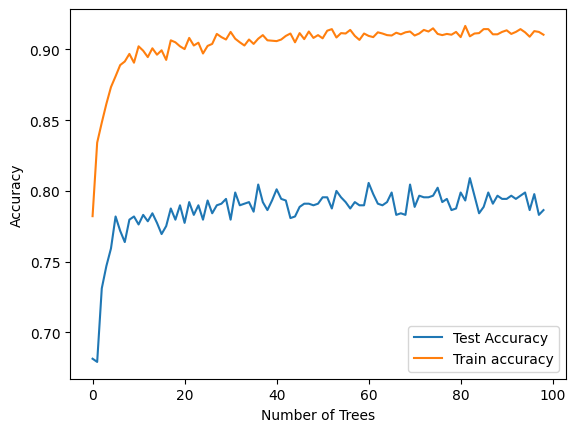

In [ ]:
numtrees = [i for i in range(1, 100)]
tr_acc = []
te_acc = []
for tree in numtrees:
  RF = RandomForestClassifier(n_estimators=tree, max_depth=10, random_state=seed)
  RF.fit(X_train, y_train)
  tr_acc.append(RF.score(X_train, y_train))
  te_acc.append(RF.score(X_test, y_test))

fig, axes = plt.subplots()
axes.plot(te_acc, label = "Test Accuracy")
axes.plot(tr_acc, label = "Train accuracy")
axes.legend()
axes.set_xlabel('Number of Trees')
axes.set_ylabel('Accuracy')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
x = df.drop('Target', axis=1)
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
RF = RandomForestClassifier(n_estimators=96,max_depth = 10)
RF.fit(X_train, y_train)
print("Test Accuracy:", RF.score(X_test, y_test))
print("Train Accuracy:", RF.score(X_train, y_train))

Test Accuracy: 0.7603978300180831
Train Accuracy: 0.9135021097046413


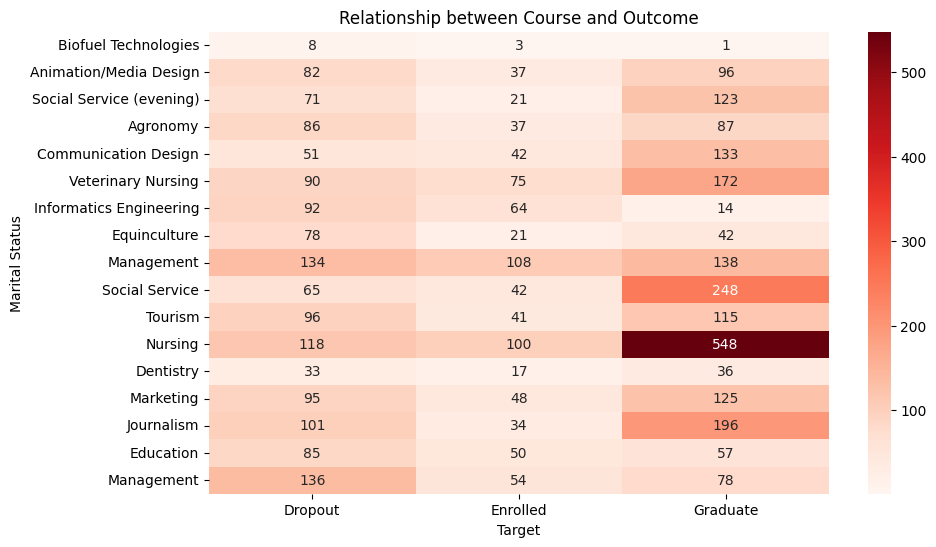

In [ ]:
crosstab = pd.crosstab(df['Course'], df['Target'])

# Create a heatmap using Seaborn

#crosstab.rename(columns={0: 'Dropped', 1: 'Enrolled', 2: 'Graduated'}, inplace=True)

crosstab.rename(index={33: 'Biofuel Technologies',
                      171: 'Animation/Media Design',
                      8014: 'Social Service (evening)',
                      9003: 'Agronomy',
                      9070: 'Communication Design',
                      9085: 'Veterinary Nursing',
                      9119: 'Informatics Engineering',
                      9130: 'Equinculture',
                      9147: 'Management',
                      9238: 'Social Service',
                      9254: 'Tourism',
                      9500: 'Nursing',
                      9556: 'Dentistry',
                      9670: 'Marketing', 9773: 'Journalism', 9853: 'Education', 9991: 'Management'}, inplace=True)

crosstab.rename(columns={0: 'Dropped', 1: 'Enrolled', 2: 'Graduated'}, inplace=True)

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
sns.heatmap(crosstab, annot=True, cmap="Reds", fmt="d")  # Use a greenish color palette and display counts

plt.xlabel('Target')
plt.ylabel('Marital Status')
plt.title('Relationship between Course and Outcome')
plt.show()

In [ ]:
crosstabdf = pd.DataFrame(crosstab)
crosstabdf

Target,Dropout,Enrolled,Graduate
Course,,,
Biofuel Technologies,8,3,1
Animation/Media Design,82,37,96
Social Service (evening),71,21,123
Agronomy,86,37,87
Communication Design,51,42,133
Veterinary Nursing,90,75,172
Informatics Engineering,92,64,14
Equinculture,78,21,42
Management,134,108,138


In [ ]:
crosstabdf['DropPercent']= ((crosstabdf['Dropout']/(crosstabdf['Dropout']+crosstabdf['Enrolled']+crosstabdf['Graduate']))*100)
crosstabdf

Target,Dropout,Enrolled,Graduate,DropPercent
Course,,,,
Biofuel Technologies,8,3,1,66.666667
Animation/Media Design,82,37,96,38.139535
Social Service (evening),71,21,123,33.023256
Agronomy,86,37,87,40.952381
Communication Design,51,42,133,22.566372
Veterinary Nursing,90,75,172,26.706231
Informatics Engineering,92,64,14,54.117647
Equinculture,78,21,42,55.319149
Management,134,108,138,35.263158


In [ ]:
# Check for duplicate values in index and columns
print("Duplicate values in index:", crosstabdf.index.duplicated().any())
print("Duplicate values in columns:", crosstabdf.columns.duplicated().any())

# If duplicates are found, consider renaming or dropping them before applying styling
if crosstabdf.index.duplicated().any():
    crosstabdf = crosstabdf.loc[~crosstabdf.index.duplicated()]  # Drop duplicate rows

if crosstabdf.columns.duplicated().any():
    crosstabdf = crosstabdf.loc[:, ~crosstabdf.columns.duplicated()]  # Drop duplicate columns

#Function to color the target column in light red
def highlight_droppercent(val):
  color = 'pink' if val > 0 else ''
  return 'background-color: {}'.format(color)

crosstabdf.style.applymap(highlight_droppercent, subset=['DropPercent'])


Duplicate values in index: True
Duplicate values in columns: False


<ipython-input-43-b993243ea8b2>:17: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  crosstabdf.style.applymap(highlight_droppercent, subset=['DropPercent'])


Target,Dropout,Enrolled,Graduate,DropPercent
Course,,,,
Biofuel Technologies,8,3,1,66.666667
Animation/Media Design,82,37,96,38.139535
Social Service (evening),71,21,123,33.023256
Agronomy,86,37,87,40.952381
Communication Design,51,42,133,22.566372
Veterinary Nursing,90,75,172,26.706231
Informatics Engineering,92,64,14,54.117647
Equinculture,78,21,42,55.319149
Management,134,108,138,35.263158


In [ ]:
#crosstabdf.drop(columns=['level_0', 'index'], inplace=True)
crosstabdf

Target,Dropout,Enrolled,Graduate,DropPercent
Course,,,,
Biofuel Technologies,8,3,1,66.666667
Animation/Media Design,82,37,96,38.139535
Social Service (evening),71,21,123,33.023256
Agronomy,86,37,87,40.952381
Communication Design,51,42,133,22.566372
Veterinary Nursing,90,75,172,26.706231
Informatics Engineering,92,64,14,54.117647
Equinculture,78,21,42,55.319149
Management,134,108,138,35.263158


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

seed = 1234
seed = np.random.seed(seed)

X = df.drop('Target', axis=1)  # Replace 'Target' with the name of your target variable column
y = df['Target']

# Now proceed with train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
print("Test Accuracy:", KNN.score(X_test, y_test))
print("Train Accuracy:", KNN.score(X_train, y_train))

Test Accuracy: 0.5985533453887885
Train Accuracy: 0.7251356238698011


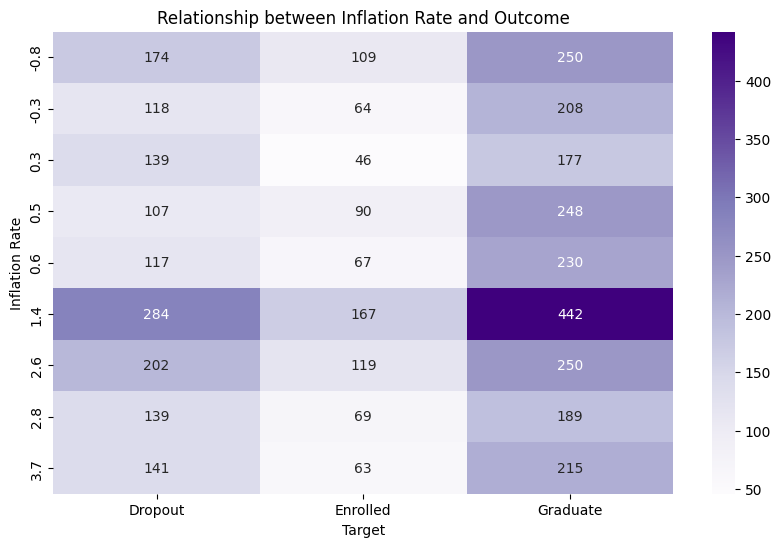

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
crosstab = pd.crosstab(df['Inflation rate'], df['Target'])

plt.figure(figsize=(10, 6))
sns.heatmap(crosstab, annot=True, cmap="Purples", fmt="d")

plt.xlabel('Target')
plt.ylabel('Inflation Rate')
plt.title('Relationship between Inflation Rate and Outcome')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

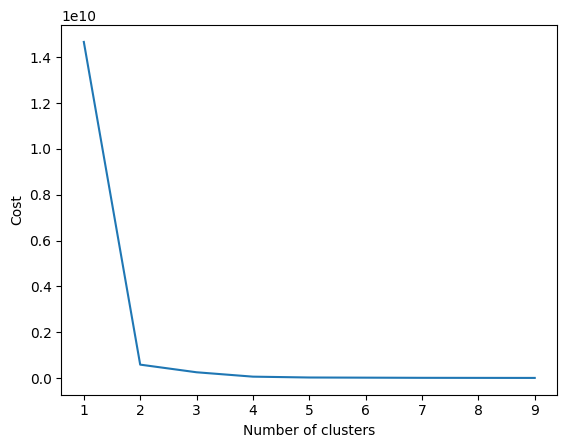

In [ ]:

from sklearn.cluster import KMeans
import numpy as np

seed = 1234
seed = np.random.seed(seed)
X = df.drop('Target', axis=1)
y = df['Target']


SSE = {}
for k in range(1, 10):
    km = KMeans(n_clusters=k, random_state=seed)
    km.fit(X_train)
    SSE[k] = km.inertia_

plt.figure()
plt.plot(list(SSE.keys()), list(SSE.values()))
plt.xlabel("Number of clusters")
plt.ylabel("Cost")
plt.show()



In [ ]:
df.head(5)

,Marital Status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [ ]:

from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=seed)
NB = GaussianNB()
NB.fit(X_train, y_train)
y_pred = NB.predict(X_test)
test_accuracy = NB.score(X_test, y_test)
print("Test Accuracy (Naive Bayes):", test_accuracy)
train_accuracy = NB.score(X_train, y_train)
print("Train Accuracy (Naive Bayes):", train_accuracy)


Test Accuracy (Naive Bayes): 0.6735985533453888
Train Accuracy (Naive Bayes): 0.6968053044002411


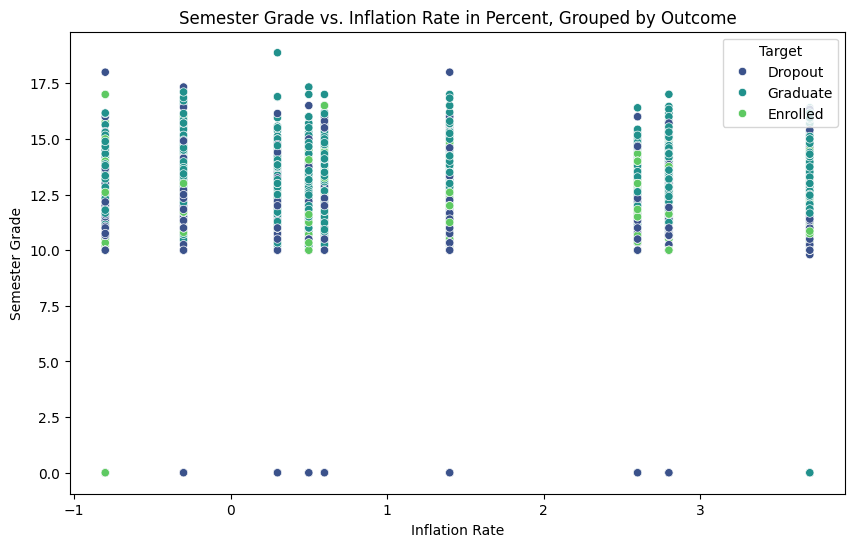

In [ ]:
# prompt: graph Semester grade vs inflation rate using all data points, group by cluster

import matplotlib.pyplot as plt
# Fit KMeans with the optimal number of clusters (let's assume it's 3 based on the elbow method)


# Add cluster labels to the DataFrame


# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Inflation rate', y='Curricular units 1st sem (grade)', hue='Target', data=df, palette='viridis')
plt.xlabel('Inflation Rate')
plt.ylabel('Semester Grade')
plt.title('Semester Grade vs. Inflation Rate in Percent, Grouped by Outcome')
plt.show()
